In [81]:
import pandas as pd 
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
stock_df = pd.read_csv('^GSPC.csv',date_parser = True )

In [39]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.set_index(['Date'])


In [41]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


In [ ]:
df.fillna(method='ffill',inplace=True)

In [44]:
df = stock_df.resample('D').mean()
df.fillna(method='ffill',inplace=True)

In [47]:
training = df['2016-01-04':'2018-12-31'].copy()
training

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4.304880e+09
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3.706620e+09
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4.336660e+09
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5.076590e+09
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4.664940e+09
...,...,...,...,...,...,...
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4.096610e+09
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3.702620e+09
2018-12-29,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3.702620e+09


In [70]:
train = df['2016-01-04':'2018-12-31'].copy()
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4.304880e+09
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3.706620e+09
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4.336660e+09
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5.076590e+09
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4.664940e+09


In [73]:
test = df['2019-01-01':].copy()
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3.442870e+09
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3.733160e+09
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3.822860e+09
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4.213410e+09
2019-01-05,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4.213410e+09


In [53]:
train = train.drop(['Adj Close'],axis = 1)

In [87]:
# Stocks_Daily_Close = stock_daily_df.drop(columns=['Open','High','Low','Adj Close','Volume',]

In [33]:
# training = stock_daily_df['2016-01-04':'2018-12-31']
# train_X,train_y = training[['Open','High','Low','Adj Close','Volume','Close']],training['Close']
# testing  = stock_daily_df['2019-01-01':]
# test_X,test_Y = testing[['Open','High','Low','Adj Close','Volume','Close']],testing['Close']

In [54]:
scaler = MinMaxScaler()
training = scaler.fit_transform(train)
training

array([[0.18561479, 0.17478583, 0.16076853, 0.16663799, 0.47211877],
       [0.16348246, 0.15992171, 0.17374065, 0.17031416, 0.37653833],
       [0.16160631, 0.15056995, 0.15125205, 0.1463052 , 0.47719608],
       ...,
       [0.60303981, 0.61547118, 0.5933607 , 0.59605872, 0.37589927],
       [0.60303981, 0.61547118, 0.5933607 , 0.59605872, 0.37589927],
       [0.60319381, 0.60538805, 0.60225066, 0.61522063, 0.33440056]])

In [55]:
X_train = []
y_train = []

In [57]:
for i in range(60,training.shape[0]):
    X_train.append(training[i-60:i])
    y_train.append(training[i,0])

In [58]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [60]:
X_train.shape, y_train.shape

((1033, 60, 5), (1033,))

### Building RNN LSTM Model 

In [95]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation='relu',return_sequences = True, input_shape=(X_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation='relu',return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation='relu',return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation='relu'))
regressor.add(Dropout(0.2))


regressor.add(Dense(1))

In [96]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 120)              

In [97]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [112]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 2/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 3/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 4/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 5/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 6/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 7/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0022
Epoch 8/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 9/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 10/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 11/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 12/100
1033/1033 [==============================] - 3s 3ms/step - lo

1033/1033 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 98/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 99/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 100/100
1033/1033 [==============================] - 3s 3ms/step - loss: 0.0011


### Preparing Test Data

In [113]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3.442870e+09
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3.733160e+09
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3.822860e+09
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4.213410e+09
2019-01-05,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4.213410e+09


In [114]:
train.tail(60)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-02,2745.449951,2756.550049,2700.439941,2723.060059,2723.060059,4.237930e+09
2018-11-03,2745.449951,2756.550049,2700.439941,2723.060059,2723.060059,4.237930e+09
2018-11-04,2745.449951,2756.550049,2700.439941,2723.060059,2723.060059,4.237930e+09
2018-11-05,2726.370117,2744.270020,2717.939941,2738.310059,2738.310059,3.623320e+09
2018-11-06,2738.399902,2756.820068,2737.080078,2755.449951,2755.449951,3.510860e+09
2018-11-07,2774.129883,2815.149902,2774.129883,2813.889893,2813.889893,3.914750e+09
2018-11-08,2806.379883,2814.750000,2794.989990,2806.830078,2806.830078,3.630490e+09
2018-11-09,2794.100098,2794.100098,2764.239990,2781.010010,2781.010010,4.019090e+09
2018-11-10,2794.100098,2794.100098,2764.239990,2781.010010,2781.010010,4.019090e+09


In [115]:
past_60_days = train.tail(60)

In [116]:
dff = past_60_days.append(test)
dff = dff.drop(['Adj Close'],axis = 1)
dff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-02,2745.449951,2756.550049,2700.439941,2723.060059,4.237930e+09
2018-11-03,2745.449951,2756.550049,2700.439941,2723.060059,4.237930e+09
2018-11-04,2745.449951,2756.550049,2700.439941,2723.060059,4.237930e+09
2018-11-05,2726.370117,2744.270020,2717.939941,2738.310059,3.623320e+09
2018-11-06,2738.399902,2756.820068,2737.080078,2755.449951,3.510860e+09


In [117]:
inputs =scaler.transform(dff)
inputs

array([[0.82661139, 0.83146705, 0.79707421, 0.81147718, 0.46142257],
       [0.82661139, 0.83146705, 0.79707421, 0.81147718, 0.46142257],
       [0.82661139, 0.83146705, 0.79707421, 0.81147718, 0.46142257],
       ...,
       [1.28138592, 1.28066298, 1.27507361, 1.28072836, 0.17236785],
       [1.27491488, 1.27425477, 1.25913817, 1.26372691, 0.26576911],
       [1.25233824, 1.26584461, 1.25507371, 1.2723411 , 0.2466805 ]])

In [118]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [119]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [120]:
y_pred = regressor.predict(X_test)

In [121]:
y_pred

array([[0.5637053 ],
       [0.5677519 ],
       [0.5699568 ],
       [0.5698138 ],
       [0.56781393],
       [0.564856  ],
       [0.56196064],
       [0.5605806 ],
       [0.56275856],
       [0.56980145],
       [0.5809305 ],
       [0.5946014 ],
       [0.60888416],
       [0.62226486],
       [0.63266397],
       [0.6407584 ],
       [0.6472702 ],
       [0.6532246 ],
       [0.66002893],
       [0.66748095],
       [0.6748681 ],
       [0.6815187 ],
       [0.6861041 ],
       [0.68952715],
       [0.69243693],
       [0.69543296],
       [0.69844353],
       [0.70129704],
       [0.7030318 ],
       [0.70379496],
       [0.70491517],
       [0.7047755 ],
       [0.70684046],
       [0.7115912 ],
       [0.7178997 ],
       [0.72567797],
       [0.73435014],
       [0.7427223 ],
       [0.74720573],
       [0.749177  ],
       [0.7498769 ],
       [0.7500866 ],
       [0.7513151 ],
       [0.7541261 ],
       [0.75887656],
       [0.7638336 ],
       [0.76991755],
       [0.776

In [122]:
scaler.scale_

array([9.06322517e-04, 9.14152060e-04, 8.95247028e-04, 9.07712800e-04,
       1.59764060e-10])

In [123]:
scale = 1/9.06322517e-04
scale

1103.3599863656482

In [124]:
y_pred = y_pred*scale
y_test = y_test*scale

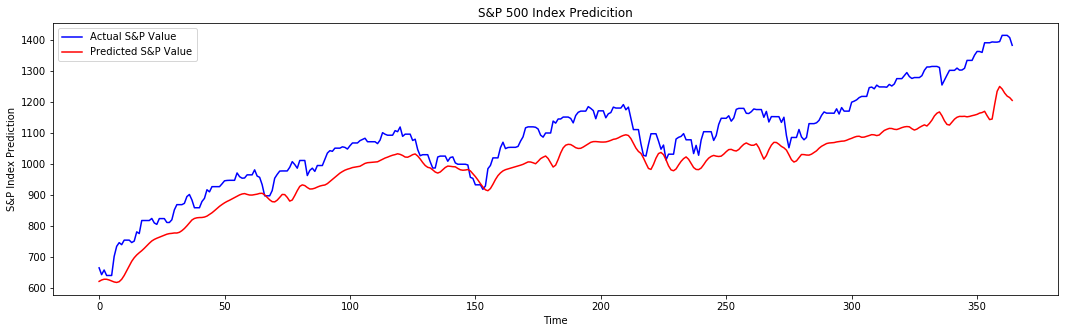

In [125]:
plt.figure(figsize=(18,5))
plt.plot(y_test, color = 'b', label = 'Actual S&P Value')
plt.plot(y_pred ,color ='r', label = 'Predicted S&P Value')
plt.title('S&P 500 Index Predicition')
plt.xlabel('Time')
plt.ylabel('S&P Index Prediction')
plt.legend()
plt.show()

In [23]:
scaler = MinMaxScaler()
scaler.fit(training)
train = scaler.transform(training)
test = scaler.transform(testing)
# train_x, train_y = 
# validation_x, validation_y =
train.shape 

(1093, 7)

In [24]:
train

array([[0.18561479, 0.17478583, 0.16076853, ..., 0.16663799, 0.47211877,
        0.00550964],
       [0.16348246, 0.15992171, 0.17374065, ..., 0.17031416, 0.37653833,
        0.00826446],
       [0.16160631, 0.15056995, 0.15125205, ..., 0.1463052 , 0.47719608,
        0.01101928],
       ...,
       [0.60303981, 0.61547118, 0.5933607 , ..., 0.59605872, 0.37589927,
        0.99173554],
       [0.60303981, 0.61547118, 0.5933607 , ..., 0.59605872, 0.37589927,
        0.99173554],
       [0.60319381, 0.60538805, 0.60225066, ..., 0.61522063, 0.33440056,
        1.        ]])

In [130]:
n_input=365 
n_features = 1

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=500)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=40)





Epoch 1/40
2/2 [==============================] - 3s 1s/step - loss: 0.4604
Epoch 2/40
2/2 [==============================] - 2s 1s/step - loss: 0.3596
Epoch 3/40
2/2 [==============================] - 2s 1s/step - loss: 0.2742
Epoch 4/40
2/2 [==============================] - 2s 1s/step - loss: 0.1616
Epoch 5/40
2/2 [==============================] - 2s 1s/step - loss: 0.0578
Epoch 6/40
2/2 [==============================] - 2s 1s/step - loss: 0.0623
Epoch 7/40
2/2 [==============================] - 2s 1s/step - loss: 0.0123
Epoch 8/40
2/2 [==============================] - 2s 1s/step - loss: 0.0278
Epoch 9/40
2/2 [==============================] - 2s 1s/step - loss: 0.0362
Epoch 10/40
2/2 [==============================] - 2s 1s/step - loss: 0.0383
Epoch 11/40
2/2 [==============================] - 2s 1s/step - loss: 0.0358
Epoch 12/40
2/2 [==============================] - 2s 1s/step - loss: 0.0294
Epoch 13/40
2/2 [==============================] - 2s 1s/step - loss: 0.0205
Epoch 14

In [131]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:],[[pred_list[i]]],axis=1)


In [123]:
Stocks_Daily_Close

,Close
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2019-12-27,3240.020020
2019-12-28,3240.020020
2019-12-29,3240.020020


In [132]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=Stocks_Daily_Close[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([Stocks_Daily_Close,df_predict], axis=1)




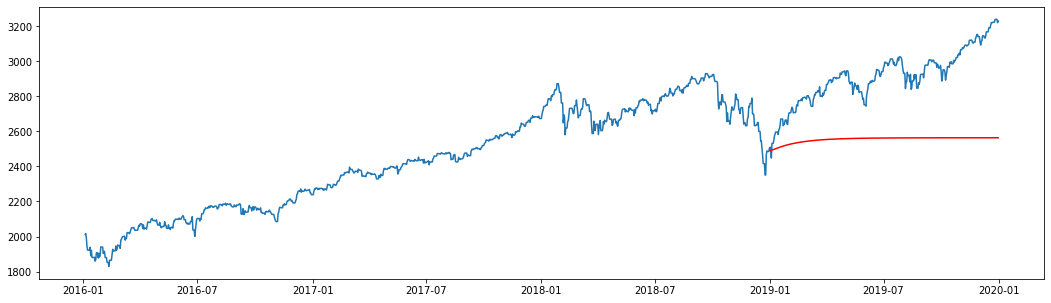

In [133]:
plt.figure(figsize=(18,5))
plt.plot(df_test.index,df_test['Close'])
plt.plot(df_test.index,df_test['Predictions'],color ='r')
plt.show()

In [58]:
roll_mean = open_daily_series.rolling(3).mean()
roll_std = open_daily_series.rolling(3).std()
roll_mean

Date
2016-01-04            NaN
2016-01-05            NaN
2016-01-06    2006.543335
2016-01-07    1983.353312
2016-01-08    1951.793335
                 ...     
2019-12-27    3234.436605
2019-12-28    3239.983317
2019-12-29    3240.020020
2019-12-30    3233.776693
2019-12-31    3230.696696
Freq: D, Name: Close, Length: 1458, dtype: float64

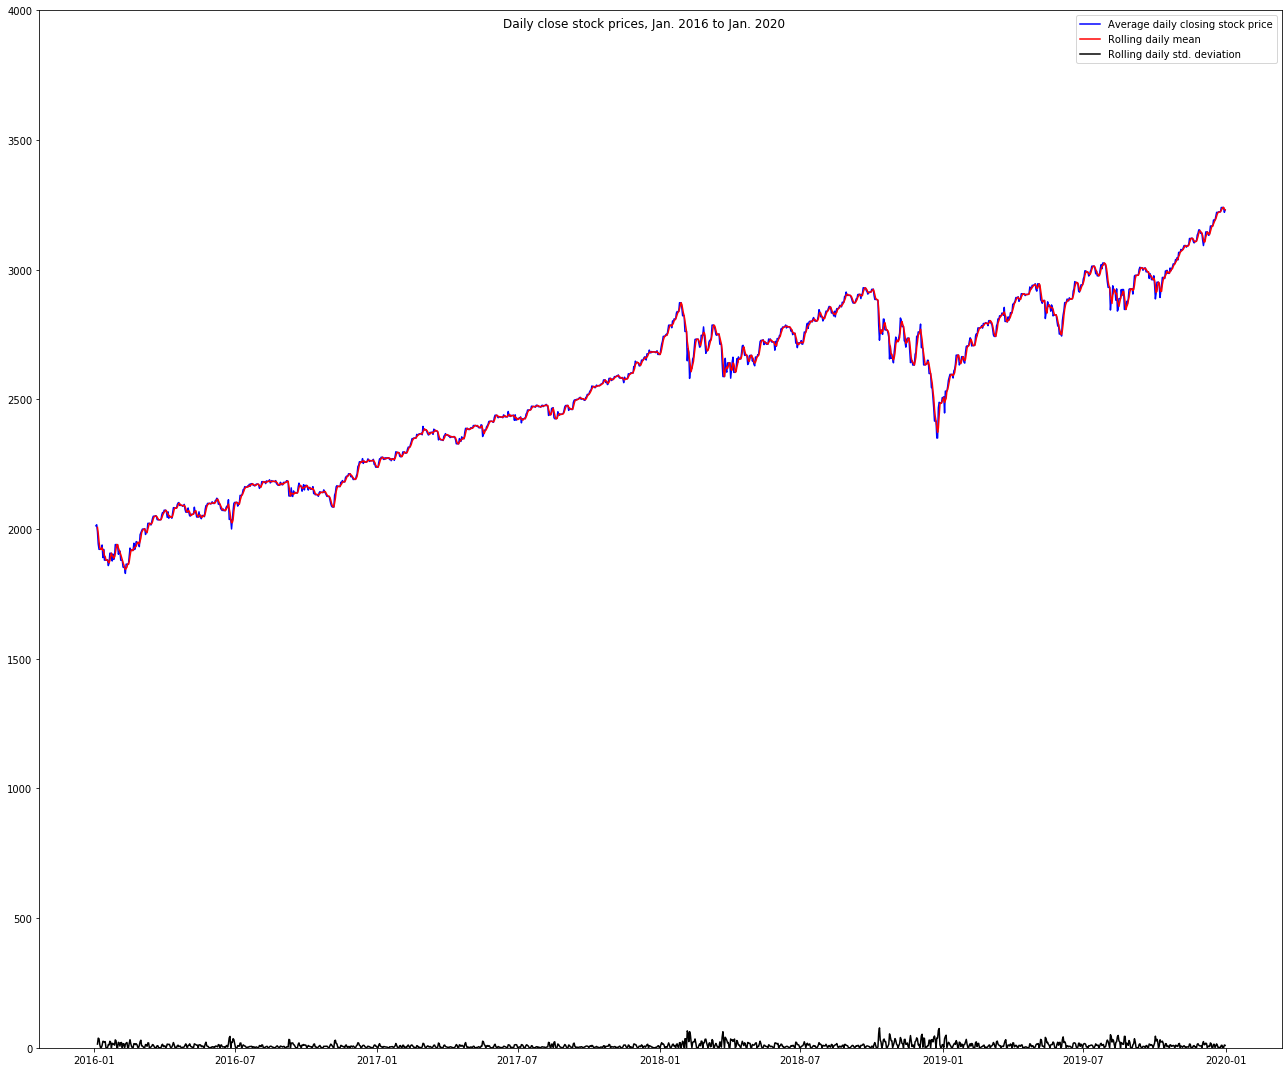

In [60]:
fig, ax = plt.subplots(figsize=(18, 15))
ax.plot(open_daily_series, color='blue',label='Average daily closing stock price')
ax.plot(roll_mean, color='red', label='Rolling daily mean')
ax.plot(roll_std, color='black', label='Rolling daily std. deviation')
ax.set_ylim(0, 4000)
ax.legend()
fig.suptitle('Daily close stock prices, Jan. 2016 to Jan. 2020')
fig.tight_layout()

In [75]:
for column in p:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler

NameError: name 'preprocessing' is not defined